<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preprocessing**

In [4]:
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv("Dataset_P2.csv")
dataset.shape
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [7]:
dataset["Class"].unique()

array([0, 2, 4, 3, 1])

### **Data Balancing**

In [8]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [10]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.0100000e+05 5.0000000e+01 1.0000000e+00 ... 1.3008535e+02
  0.0000000e+00 2.4694000e+00]
 [1.0100100e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  4.0000000e+00 6.9570000e-02]
 [1.0100200e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 6.8980000e-02]
 ...
 [2.0109800e+05 1.0030000e+03 0.0000000e+00 ... 1.3926438e+02
  1.0000000e+00 9.4370000e-02]
 [2.0109900e+05 1.0030000e+03 0.0000000e+00 ... 1.5827492e+02
  3.0000000e+00 1.6047000e-01]
 [2.0204100e+05 1.0250000e+03 0.0000000e+00 ... 1.1500407e+02
  0.0000000e+00 1.0132500e+00]]
[0 0 0 ... 0 0 0]


In [11]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 3: 14596, 1: 10049, 4: 6638, 2: 3312})


In [12]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 2: 340066, 4: 340066, 3: 340066, 1: 340066})


### **Data Preprocessing for Train and Testing**

In [14]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
y_test

array([4, 1, 2, ..., 1, 2, 0])

### **Multinomeal Naive Bayes (MNB)**

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_test_prediction = mnb.predict(X_test)

In [17]:
len(y_test_prediction)

340066

In [18]:
len(y_test)

340066

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Multinomeal Naive Bayes


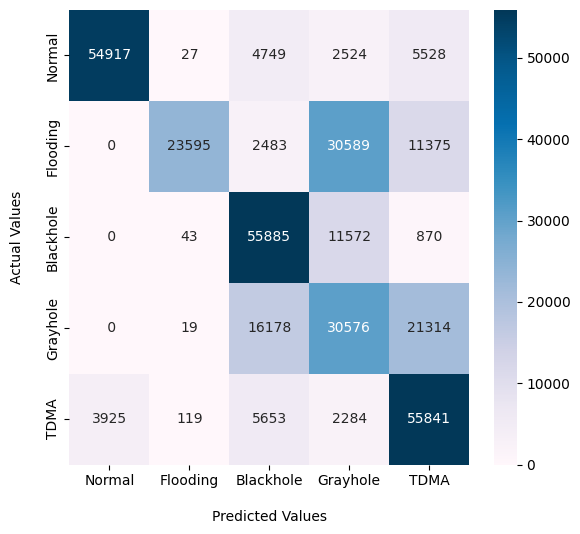

In [20]:
print("Confusion Matrix of Multinomeal Naive Bayes") 
conf_mat(y_test, y_test_prediction)

In [21]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1) 

In [22]:
performance("Multinomeal Naive Bayes",y_test, y_test_prediction)

Model Name is : Multinomeal Naive Bayes
Accuracy : 64.93268953673699
Precision : 71.27882672860308
Recall : 64.93268953673699
F1-Score : 0.6431474411070591


### **Logistic Regression (LR)**

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_test_prediction = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix of Logistic Regression


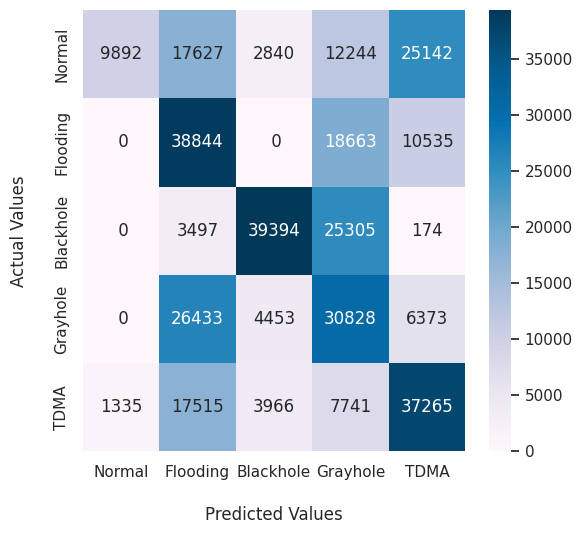

In [36]:
print("Confusion Matrix of Logistic Regression") 
conf_mat(y_test, y_test_prediction)

In [37]:
performance("Logistic Regression",y_test, y_test_prediction)

Model Name is : Logistic Regression
Accuracy : 45.939023601300924
Precision : 56.529519254842
Recall : 45.939023601300924
F1-Score : 0.4500850408294798


### **K-Nearest Neighbors (KNN)**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_prediction = knn.predict(X_test)

Confusion Matrix of KNN


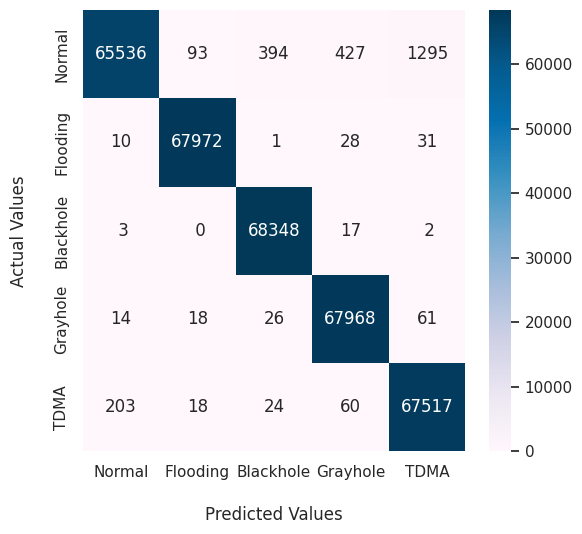

In [39]:
print("Confusion Matrix of KNN") 
conf_mat(y_test, y_test_prediction)

In [40]:
performance("KNN",y_test, y_test_prediction)

Model Name is : KNN
Accuracy : 99.1986849611546
Precision : 99.2048560137367
Recall : 99.1986849611546
F1-Score : 0.9919585793204789


### **Support vector machines (SVMs)**

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
y_test_prediction = svm.predict(X_test)

In [ ]:
print("Confusion Matrix of SVM") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("SVM",y_test, y_test_prediction)